In [10]:
import pandas as pd
df = pd.read_csv('Train.csv')

In [5]:
X, y = df.drop(['class'], axis=1), df['class']

## SVM

In [17]:
from sklearn.svm import SVC
model = SVC() # 모델 불러오기

In [21]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size= 0.3, random_state = 50) #테스트, 트레인 쪼개기

In [22]:
model.fit(train_X, train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [24]:
model.score(X = test_X, y = test_y)

0.783625730994152

In [27]:
model.score(X = train_X, y = train_y)

0.97393483709273188

## PCA

In [30]:
from sklearn.decomposition import pca
model = pca.PCA(n_components=5)

In [31]:
model.fit(X= train_X)

PCA(copy=True, iterated_power='auto', n_components=5, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
sum(model.explained_variance_ratio_) #5개의 var는 원래 25개로 설명할 수 있는 거의 86%를 설명할 수 있다

0.86513399106243472

In [43]:
pca_train_X = pd.DataFrame(model.transform(X= train_X), index=train_X.index)
pca_test_X = model.transform(X= test_X)

In [45]:
pca_model = SVC()

In [46]:
pca_model.fit(X= pca_train_X, y= train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [51]:
pca_model.score(X= pca_test_X, y= test_y) #5개의 변수를 사용해서 테스트했을 때의 정확도

0.67134502923976613

## Unsupervised

In [93]:
from sklearn.cluster import k_means

In [113]:
model = k_means(X= X, n_clusters=5)

In [114]:
vis_pca_model = pca.PCA(n_components=2)
vis_pca_model.fit(X=X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [115]:
pca_X = vis_pca_model.transform(X=X)

In [116]:
import matplotlib.pyplot as plt # 데이터 시각화를 위한 라이브러리

In [125]:
plt.scatter(pca_X[:, 0], pca_X[:, 1], c=model[1]) #X축, y축을 기준으로 점을 찍는 함수

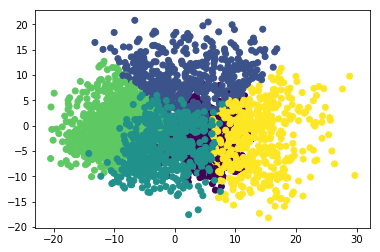

In [126]:
plt.show()

## bokeh.js

In [ ]:
# jupyter에서만 사용가능한 데이터 시각화 툴
# 이쁘고 유용한 정보를 쉽게 볼 수 있도록 도와줌